# Programming Assignment 1 - Chatbot Eliza

<br>
<b>Group 1:</b> Zack, Charles, Jay, Maryah
<br>
<b>AIT 526</b>
<br>
<b>Programming Assignment 1</b>

## Introduction
<b>Problem Statement</b><br>
describe the problem to be solved well enough so that someone not familiar with our class could understand,
<br>
<b>User Guide</b><br>
give actual examples of program input and output, along with usage instructions, including bonus functionality if you have, and
<br>
<b>Algorithm Design</b><br>
describe the algorithm you have used to solve the problem, specified in a stepwise or point by point fashion



## The Eliza Program
## 0. Virtual environment setup

<b>A) Open a terminal and execute the following commands</b>
```
conda create -y -n eliza_env python=3.9 nltk ipykernel
conda activate eliza_env
python -m ipykernel install --user --name=eliza_env
```
<b>B) Select `eliza_env` from the kernel dropdown in Jupyter Notebook</b>
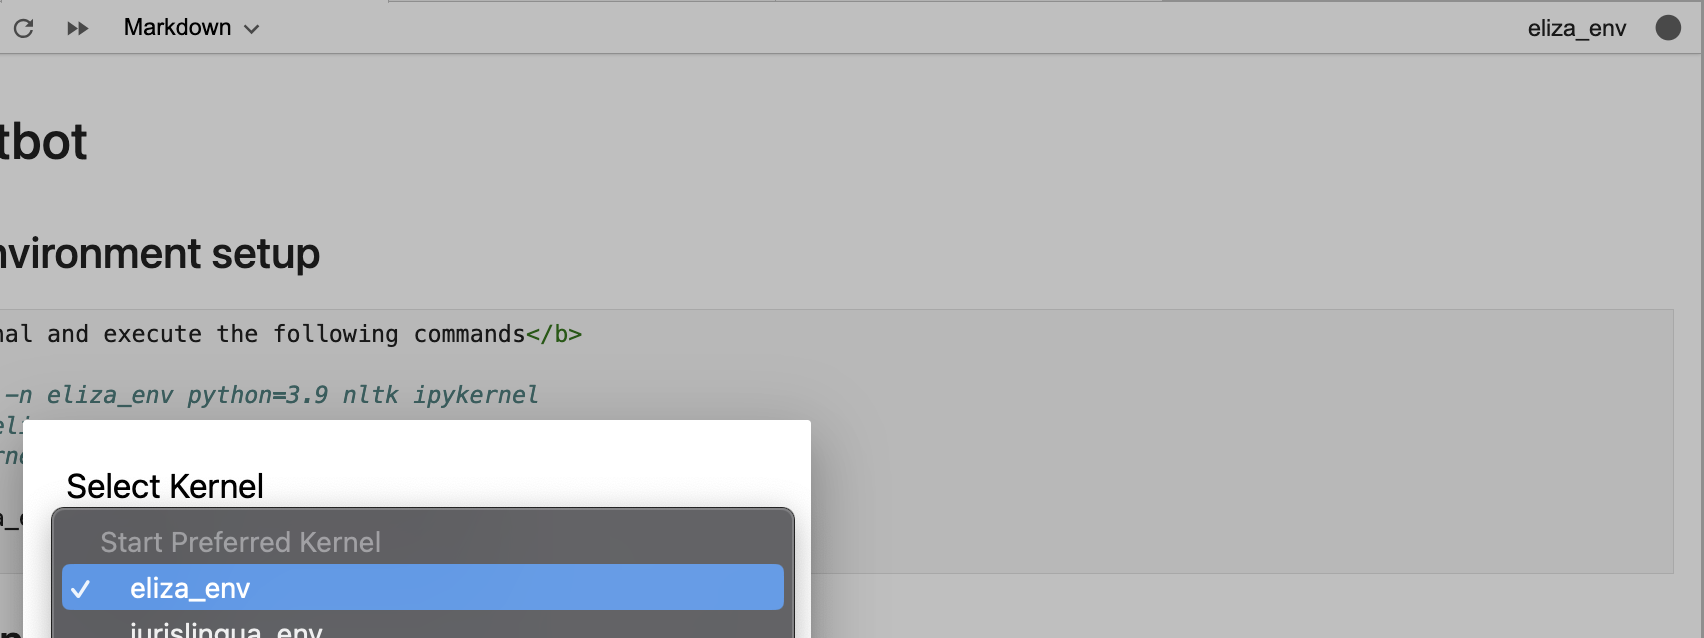

## 1. Imports

In [1]:
import re
import datetime
import random
from nltk.tokenize import word_tokenize
import json

## 2. Data dictionaries to help Eliza form responses

### 2.1 Data dictionary of responses and keywords with regex

In [2]:
# Partial data dictionary - we need more patterns to spot and associated canned responses
data_dictionary = {
    'I need (.*)' : [
        'Why do you need %s?',
        'Would it really help you to get %s?',
        'Are you sure you need %s?'
    ],
    "Why don\\'?t you ([^\\?]*)\\??" : [
        "Do you really think I don't %s?",
        "Perhaps eventually I will %s."
    ],
    "I am (.*)" : [
        "Did you come to me because you are %s",
        "How long have you been %s?",
        "How do you feel about being %s?"
    ],
    "I\\'?m (.*)" : [
        "How does being %s make you feel?",
        "Do you enjoy being %s?"
    ],
    "I would (.*)" : [
        'Could you explain why you would %s?',
        'Why would you %s?',
        'Who else knows that you would %s?'
    ],
    "Is there (.*)" : [
        "Do you think there is %s?",
        "It's likely that there is %s",
        "Would you like there to be %s?"
    ],
    "I (can\\'t|cannot) (.*)" : [
        "Did you at least try %s",
        "What do you think you can do to prepare for %s?"
    ],
    # Seems easy enough to turn around an "I don't want" statement by being vague.
    "I don\\'?t? want(.*)" : [
        "Have you ever wanted %s?",
        "Is there a reason wy you don't want %s?",
        "Do you want something else?",
        "What do you want now then?"
    ],
    # Responses assume the user is getting divorced. Could make more robust.
    "(.*)divorce(.*)" : [
        "Are you sure about pursuing this choice?",
        "What happened?",
        "Have you talked to your partner about this choice?"
    ],
    # The catch-all for any user statements that don't match patterns above or contain an end word
    "(.*)" : [
        "Can you tell me more about it?",
        "I see.",
        "Very interesting",
        "Why don't you tell me?",
        "Would you mind sharing more about it?",
        "Please tell me more.",
        "Why do you ask that?",
        "Please consider whether you can answer your own question.",
        "Perhaps the answer lies within yourself.",
        "How does that make you feel?",
        "I would like to hear more about this.",
        "Have you talked to anyone about this?"
    ]
}

### 2.2 Data dicitonary of pronoun replacements for switching between 1st and 2nd POV

In [3]:
# Pronoun dictionary
pronoun_dict = {
    "you" : "me",
    "me" : "you",
    "yours" : "mine",
    "mine" : "yours",
    "your" : "my",
    "my" : "your",
    "you will" : "I will",
    "I will" : "you will",
    "you have" : "I have",
    "I have" : "you have",
    "you can" : "I can",
    "I can" : "you can",
    "am" : "are",
    "are" : "am",
    "was" : "were",
    "were" : "was",
    "i" : "you",
    "you" : "i",
    "i'd" : "you would",
    "i've" : "you have",
    "i'll" : "you will",
    "you've" : "I have",
    "you'll" : "I will"   
}

### 2.3 Example: saving data dictionaries to static json files

In [4]:
# In case we want to save to json file
f = open("data.json", 'w')
json.dump(data_dictionary, f)
f.close()

In [5]:
# and load from json file
with open('data.json', 'r') as fp:
    dic = json.load(fp)

## 3. Eliza functionality

In [6]:
# Pronoun replacement for better, more realisticly formed responses
def replace_pronouns(match):
    """ Substitute pronouns to turn 2nd pov into 1st pov and 1st pov into 2nd pov, vice versa """
    tokenizer = word_tokenize(match)
    
    for x, token in enumerate(tokenizer):
        if token in pronoun_dict:
            tokenizer[x] = pronoun_dict[token]
    return ' '.join(tokenizer)
    
# Better function name might be get_eliza_response
def get_input(user_input, data_dictionary=dic):
    """ Returns Eliza's response to user input. """
    for pattern, responses in data_dictionary.items():
        # Check for matching input v. key
        ans = re.search(pattern.lower(), user_input.rstrip(",.!")) # pattern.lower() here is a shameful hack
        
        # if the key matches the input, returns (prints) the "response"
        if ans:
            # Randomly choose a valid response
            response = random.choice(responses)
            
            # If we need to rephrase part of the question in the output
            if "%s" in response:
                match = ans[1]
                # when and if the key word contains 2nd or 1st person pov, transform
                # and vice versa
                response = response % (replace_pronouns(match))
                return response
            else:
                return response
            
def handle(user_name):
    """ Main engine of the chat bots. Verify the username entered and resend the greeting """
    print("Eliza: Welcome %s. What do you want to say today?" % user_name)
    # standard expression for bye
    end = [r'.*quit.*', r'.*bye.*', r'.*exit.*']
    user_continue = True
    while user_continue:
        # check and get input name and information
        user_input = input('%s: ' % user_name)
        print()
        # convert input into lowercase
        user_input = user_input.lower()
        
        # check for 'end' input such as 'bye' or 'exit'
        for i in end:
            user_exit = re.findall(i, user_input)
            # if there is an "end" input, exit the while loop
            if len(user_exit) != 0:
                user_continue = False
        # If there is no "end" input, continue and return an appropriate response
        if user_continue:
            response = get_input(user_input)
            print("Eliza: " + response)
    
def greeting():
    """ Additional features for greeting at the correct time: morning, noon, evening """
    current_time = datetime.datetime.now()
    if current_time.hour < 12:
        return "Good morning"
    elif 12 <= current_time.hour < 18:
        return "Good afternoon"
    else:
        return "Good evening"
    
def init_conversation():
    """ Start a dialog and respond by entering an additional function greeting ... """
    print("Eliza: %s I'm Eliza, a psychotherapist. Who do I have the pleasure of talking to today?" % greeting())
    
    name_input = input('User: ')
    print()
    
    tokenizer = word_tokenize(name_input.replace('.', ''))
    
    user_name = tokenizer[-1]
    return user_name

def ending():
    """ ability to end chats at the correct time """
    current_time = datetime.datetime.now()
    
    if current_time.hour < 12:
        return "great morning"
    elif 12 <= current_time.hour < 18:
        return "great afternoon"
    else:
        return "great evening"
    
def main():
    """ main function to start chat conversation. """
    user_name = init_conversation()
    handle(user_name)
    
    print(
        """Eliza: Bye %s. Thanks for attending this meeting\nhave a %s""" % (user_name, ending())
    )

## 4. "Therapy Session" with Eliza

In [7]:
if __name__ == '__main__':
    main()

Eliza: Good evening I'm Eliza, a psychotherapist. Who do I have the pleasure of talking to today?


User:  Zack



Eliza: Welcome Zack. What do you want to say today?


Zack:  I am here to show you off to the rest of Group 1.



Eliza: Did you come to me because you are here to show i off to the rest of group 1


Zack:  That's precisely why I'm here, yes.



Eliza: How does being here , yes make you feel?


Zack:  I would feel better if your syntax was more realistic.



Eliza: Could you explain why you would feel better if my syntax were more realistic?


Zack:  I would be proud that you are responding like a Psycotherapist as intended.



Eliza: Why would you be proud that i am responding like a psycotherapist as intended?


Zack:  Because I helped build you.



Eliza: Would you mind sharing more about it?


Zack:  Sure, the professor's video helped quite a bit. I enjoyed creating patterns and responses for you to spot.



Eliza: Bye Zack. Thanks for attending this meeting
have a great evening
